# 3: Data Visualisation
## What I can do:
- Visualising the dataset
    - Pie charts
    - Box Plots
    - Scatter plots
    - Distance matrices
    - Dimensionality reduction
- Visualising an analytic function
    - Heat maps
    - Contour plots
    - Surface plots
    - Quiver plots


## 1 Exploring and visualising the graduation rate dataset


In order to present typical Python functionalities for data exploration and data visualisation, we will use the graduation rate dataset (http://roycekimmons.com/tools/generated_data) as part of a working example.

Note that this is a **synthetic** dataset that presents a familiar setting for the sake of simplicity. Therefore, this dataset should not be used to draw conclusions about students in the real world.

### 1.1 Loading the graduation rate dataset

The function ``display`` used within a notebook is similar to the Python function ``print``, but presents a ``DataFrame`` in a much more convenient format. By default, only the first five rows and the last five rows of a large ``DataFrame`` are shown.

This initial inspection reveals that most features are numerical, except for the feature ``parental level of education``, which has multiple text values. In order to display the valid values for this feature, we select the corresponding column from the ``DataFrame``, and use the method ``Series.unique``. This method returns the unique values across a ``Series``.

In [1]:
# Loading dataset (http://roycekimmons.com/tools/generated_data)
import pandas as pd

df = pd.read_csv('graduation_rate.csv')

print('Dataset (head and tail):')
display(df)

print('\nParental levels of education:')
print(df['parental level of education'].unique())


Dataset (head and tail):


ACT composite score  SAT total score parental level of education  \
0                     30             2206             master's degree   
1                     26             1953                some college   
2                     28             2115            some high school   
3                     33             2110            some high school   
4                     30             2168           bachelor's degree   
..                   ...              ...                         ...   
995                   30             1967                 high school   
996                   28             2066                some college   
997                   27             1971                 high school   
998                   30             2057                some college   
999                   29             2054            some high school   

     parental income  high school gpa  college gpa  years to graduate  
0              94873              4.0          3.8                  3  
1              42767              3.6          2.7                  9  
2              46316              4.0          3.3                  5  
3              52370              4.0          3.5                  4  
4              92665              4.0          3.6                  4  
..               ...              ...          ...                ...  
995            49002              3.8          3.5                  6  
996            83438              3.9          3.5                  4  
997            68577              3.6          3.7                  5  
998            56876              3.8          3.6                  3  
999            40068              3.9          3.3                  5  

[1000 rows x 7 columns]


Parental levels of education:
["master's degree" 'some college' 'some high school' "bachelor's degree"
 "associate's degree" 'high school']


### 1.2 Pre-processing features

In order to establish a natural ordering over ``parental level of education``, the corresponding column of the ``DataFrame`` is substituted by a column of ordinal features created using the function ``pd.Categorical``.

In [2]:
education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

df['parental level of education'] = pd.Categorical(df['parental level of education'],
                                                   ordered=True,
                                                   categories=education_order)

display(df['parental level of education'])

0        master's degree
1           some college
2       some high school
3       some high school
4      bachelor's degree
             ...        
995          high school
996         some college
997          high school
998         some college
999     some high school
Name: parental level of education, Length: 1000, dtype: category
Categories (6, object): ['some high school' < 'high school' < 'some college' < 'associate's degree' < 'bachelor's degree' < 'master's degree']

### 1.3 Data summarisation

The method ``DataFrame.describe`` can be used to compute most of the univariate summaries that we have covered during the lectures. For each feature, this method computes the mean, standard deviation, minimum, maximum, median, lower quartile, and upper quartile. 

Note that ``DataFrame.describe`` detects and omits the categorical feature ``parental level of education``, since those summaries would not be useful. Instead, it is possible to use the method ``Series.value_counts`` to derive the frequency of each value of this feature.

The method ``DataFrame.corr`` can be used to compute the correlation matrix for the (numerical) features in the dataset.

In [3]:
print('Univariate summaries:')
display(df.describe())
print("Frequency of parental levels of education:")

# relative frequency by dividing with len(df)
freq_education = df['parental level of education'].value_counts()/len(df)
display(freq_education)

print("\nCorrelation coefficients:")
display(df.corr())

Univariate summaries:


ACT composite score  SAT total score  parental income  high school gpa  \
count          1000.000000      1000.000000      1000.000000      1000.000000   
mean             28.557000      1997.803000     66564.905000         3.712900   
std               2.776051       142.736442     19451.865744         0.283415   
min              19.000000      1498.000000      1882.000000         2.700000   
25%              27.000000      1907.750000     53443.000000         3.500000   
50%              29.000000      1999.000000     65441.000000         3.800000   
75%              30.000000      2092.250000     79845.250000         4.000000   
max              36.000000      2397.000000    120391.000000         4.000000   

       college gpa  years to graduate  
count   1000.00000        1000.000000  
mean       3.36990           4.992000  
std        0.23622           1.403533  
min        2.70000           3.000000  
25%        3.20000           4.000000  
50%        3.40000           5.000000  
75%        3.50000           6.000000  
max        4.00000          10.000000

Frequency of parental levels of education:


some college          0.224
associate's degree    0.213
some high school      0.196
high school           0.196
bachelor's degree     0.103
master's degree       0.068
Name: parental level of education, dtype: float64


Correlation coefficients:


ACT composite score  SAT total score  parental income  \
ACT composite score             1.000000         0.885884         0.183879   
SAT total score                 0.885884         1.000000         0.247556   
parental income                 0.183879         0.247556         1.000000   
high school gpa                 0.874206         0.910425         0.227238   
college gpa                     0.507349         0.518257         0.460863   
years to graduate              -0.129880        -0.125523        -0.239500   

                     high school gpa  college gpa  years to graduate  
ACT composite score         0.874206     0.507349          -0.129880  
SAT total score             0.910425     0.518257          -0.125523  
parental income             0.227238     0.460863          -0.239500  
high school gpa             1.000000     0.492489          -0.119524  
college gpa                 0.492489     1.000000          -0.467499  
years to graduate          -0.119524    -0.467499           1.000000

### 1.4 Table visualisation

The method ``DataFrame.sort_values`` can be used to sort the rows of a ``DataFrame`` by the value of a specific feature, in ascending or descending order. For instance, we can use this method to sort students by ``college gpa``.

We can also use **slicing** to select a range of observations from a ``DataFrame``. For example, we may sort the students by increasing ``parental income`` and then select the first ten students (with the lowest ``parental income``).

When a ``DataFrame`` is indexed by a list of boolean values that has as many elements as the ``DataFrame`` has rows, only the rows that correspond to ``True`` values are returned. This also works when the list used for indexing is represented by a ``Series``. This functionality can be used to select rows that pass a test based on their features. For example, we may use it to select the students whose parents are educated beyond high school. 

The method ``DataFrame.groupby`` provides a simple way to partition observations into groups based on the value of chosen categorical features (for example, ``parental level of education``) and operating independently on each group (for example, computing the mean of the numerical features independently for each group).

In [4]:
#print(df.to_latex()) # Print a table for use with LaTeX
print('Sorting by college gpa:')
display(df.sort_values(by='college gpa', ascending=False))

print('Selecting the ten students with lowest parental income :')
display(df.sort_values(by='parental income', ascending=True)[0:10])

print('Sorting by high school gpa the students whose parents are educated beyond high school')
# Note that a boolean sequence can be used to index a DataFrame
display(df[df['parental level of education'] > 'high school'].sort_values(by='high school gpa', ascending=False))
    
print('Grouping by parental level of education and computing the mean for other features:')
display(df.groupby('parental level of education').mean())

Sorting by college gpa:


ACT composite score  SAT total score parental level of education  \
378                   30             2219             master's degree   
161                   36             2397             master's degree   
588                   34             2298          associate's degree   
352                   31             2185          associate's degree   
632                   33             2121            some high school   
..                   ...              ...                         ...   
678                   24             1681            some high school   
280                   22             1712                some college   
271                   22             1699            some high school   
1                     26             1953                some college   
45                    25             1772            some high school   

     parental income  high school gpa  college gpa  years to graduate  
378           109282              4.0          4.0                  5  
161            94847              4.0          4.0                  4  
588           116853              4.0          4.0                  4  
352            75932              4.0          3.9                  3  
632            80375              4.0          3.9                  3  
..               ...              ...          ...                ...  
678            26446              3.1          2.7                  6  
280            59960              3.0          2.7                  7  
271            61529              3.0          2.7                  5  
1              42767              3.6          2.7                  9  
45             41330              3.3          2.7                  8  

[1000 rows x 7 columns]

Selecting the ten students with lowest parental income :


ACT composite score  SAT total score parental level of education  \
171                   31             2011            some high school   
433                   27             1978            some high school   
676                   26             1895                 high school   
688                   23             1714            some high school   
346                   29             1816            some high school   
587                   27             2046                 high school   
687                   32             2118            some high school   
212                   31             2117                 high school   
955                   30             2004            some high school   
63                    28             2016            some high school   

     parental income  high school gpa  college gpa  years to graduate  
171             1882              4.0          3.0                  6  
433            15562              3.7          3.2                  9  
676            15896              3.3          3.0                  5  
688            17101              3.2          3.1                  7  
346            17706              3.5          3.3                  5  
587            21708              3.8          3.4                  4  
687            23320              4.0          3.5                  5  
212            24885              3.9          3.4                  5  
955            25024              3.8          3.3                  5  
63             25286              3.8          3.2                  6

Sorting by high school gpa the students whose parents are educated beyond high school


ACT composite score  SAT total score parental level of education  \
0                     30             2206             master's degree   
832                   30             2153                some college   
363                   28             2037           bachelor's degree   
360                   31             2156             master's degree   
761                   31             2096          associate's degree   
..                   ...              ...                         ...   
751                   22             1682          associate's degree   
353                   20             1646           bachelor's degree   
370                   21             1714          associate's degree   
228                   23             1644          associate's degree   
862                   19             1532                some college   

     parental income  high school gpa  college gpa  years to graduate  
0              94873              4.0          3.8                  3  
832            66142              4.0          3.2                  5  
363            96147              4.0          3.7                  4  
360           108696              4.0          3.4                  5  
761            48517              4.0          3.6                  4  
..               ...              ...          ...                ...  
751            66937              3.0          2.8                  9  
353            64927              3.0          2.8                  6  
370            89275              2.9          3.1                  4  
228           101997              2.8          3.2                  9  
862            32670              2.7          3.0                  6  

[608 rows x 7 columns]

Grouping by parental level of education and computing the mean for other features:


ACT composite score  SAT total score  \
parental level of education                                         
some high school                       26.969388      1895.321429   
high school                            28.377551      1967.341837   
some college                           28.513393      2007.183036   
associate's degree                     29.511737      2044.460094   
bachelor's degree                      29.174757      2066.320388   
master's degree                        29.867647      2100.161765   

                             parental income  high school gpa  college gpa  \
parental level of education                                                  
some high school                50151.229592         3.514796     3.217347   
high school                     57755.265306         3.653061     3.364286   
some college                    64733.138393         3.742857     3.351339   
associate's degree              74932.685446         3.807981     3.441315   
bachelor's degree               84635.728155         3.832039     3.438835   
master's degree                 91718.632353         3.879412     3.558824   

                             years to graduate  
parental level of education                     
some high school                      5.489796  
high school                           5.035714  
some college                          4.861607  
associate's degree                    4.877934  
bachelor's degree                     4.660194  
master's degree                       4.720588

### 1.5 Histograms

The library ``seaborn`` provides a high-level interface for drawing appealing graphics using ``matplotlib``.

The following snippet is used to configure the appearance of ``seaborn`` graphics in this notebook.

In [5]:
%config InlineBackend.figure_formats = set(['retina'])

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

The function ``distplot`` can be used to create a histogram with a specified number of bins for a given column of a ``DataFrame`` (or any list of numbers). For example, it may be used to create a histogram of ``high school gpa`` and ``college gpa``.

/Users/jiahao/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


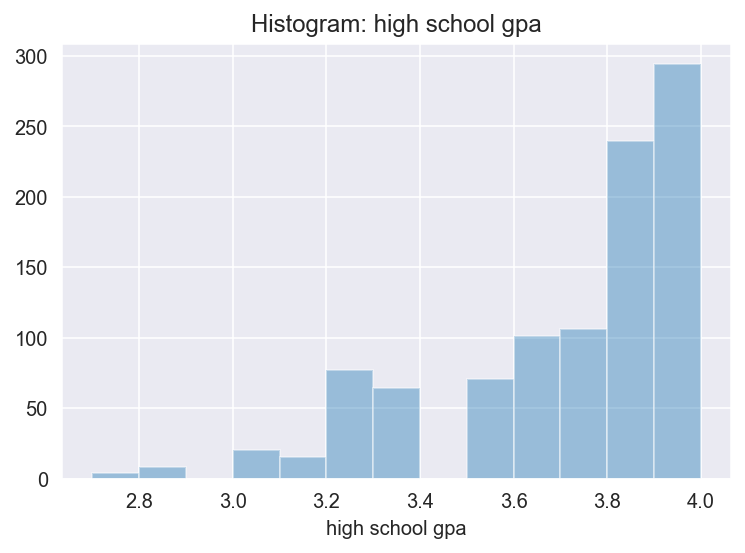

In [6]:
sns.distplot(df['high school gpa'], bins=None, kde=False)
plt.title('Histogram: high school gpa')
plt.show()

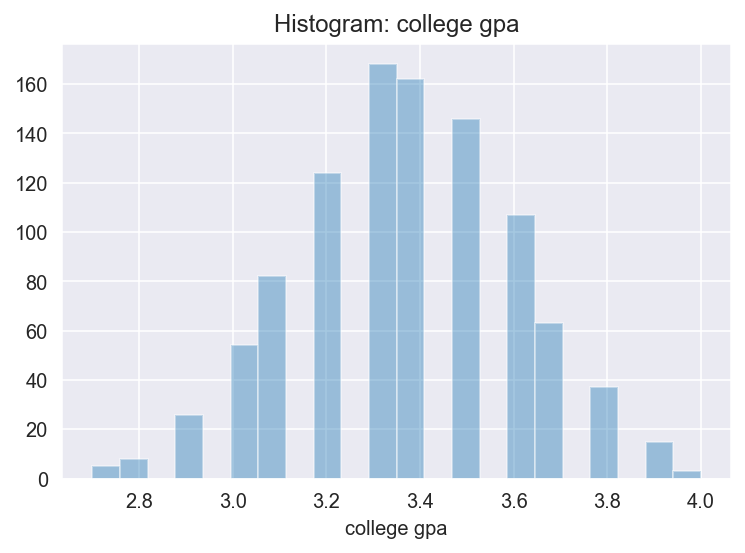

In [7]:
sns.distplot(df['college gpa'], bins=None, kde=False)
plt.title('Histogram: college gpa')
plt.show()

### 1.6 Pie charts

The library ``seaborn`` currently has no function to create pie charts (likely due to the fact that this type of visualisation is often discouraged). The ``matplotlib`` function ``pie`` (``matplotlib.pyplot.pie``) can be used to depict an array of frequencies by a pie chart. For example, we may display the frequencies of ``parental level of education`` computed in the data summarization section.

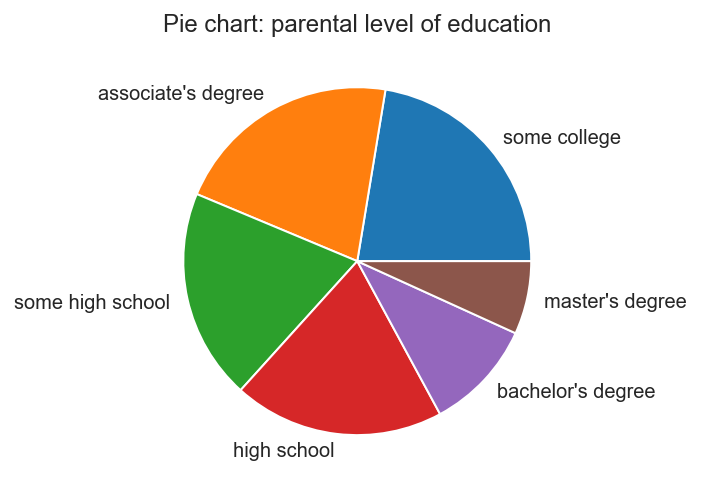

In [8]:
plt.pie(freq_education, labels=freq_education.index)
plt.title('Pie chart: parental level of education')
plt.show()

### 1.7 Box Plots

The function ``boxplot`` can be used to create a box plot for a specific feature. For example, it can be used to create a box plot for ``parental income``.

/Users/jiahao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jiahao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


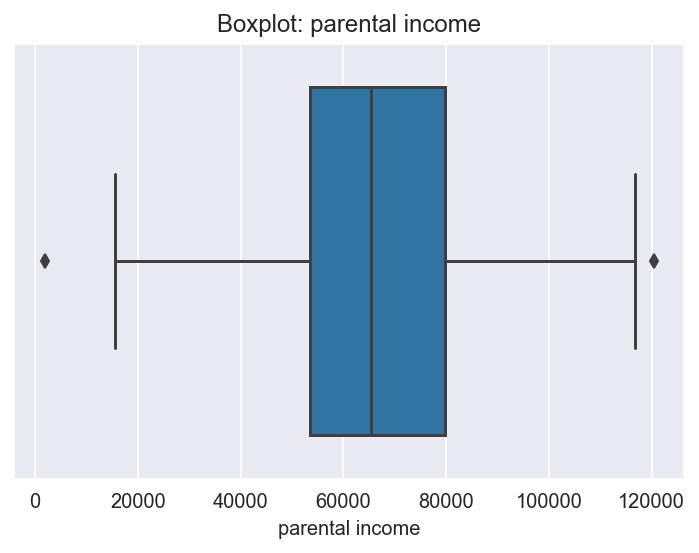

In [9]:
sns.boxplot(df['parental income'], orient='v')
plt.title('Boxplot: parental income')
plt.show()

The function ``boxplot`` is also capable of grouping observations by a categorical feature and creating one box plot for each resulting group. For example, we may create one box plot of ``parental income`` for each ``parental level of education``.

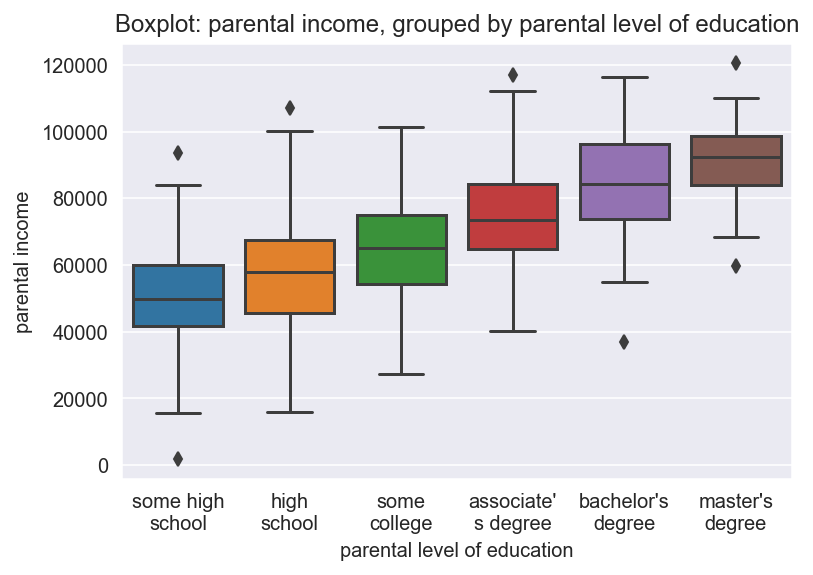

In [10]:
ax = sns.boxplot(x='parental level of education', y='parental income', data=df)
plt.title('Boxplot: parental income, grouped by parental level of education')

# Wrap xticks 
import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

plt.show()


### 1.8 Scatter plots

The function ``scatterplot`` can be used to create a scatter plot for any given pair of features, while the function ``pairplot`` can be used to create a scatter plot matrix. 

The resulting points can be coloured according to a categorical feature given by the parameter ``hue``.

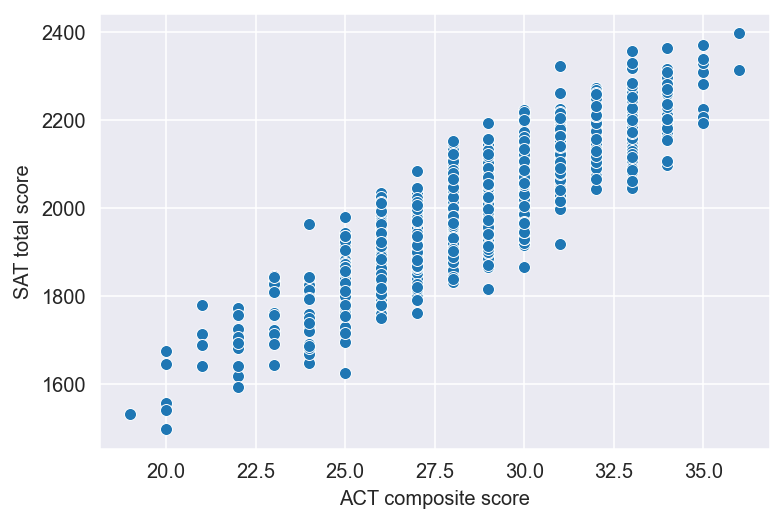

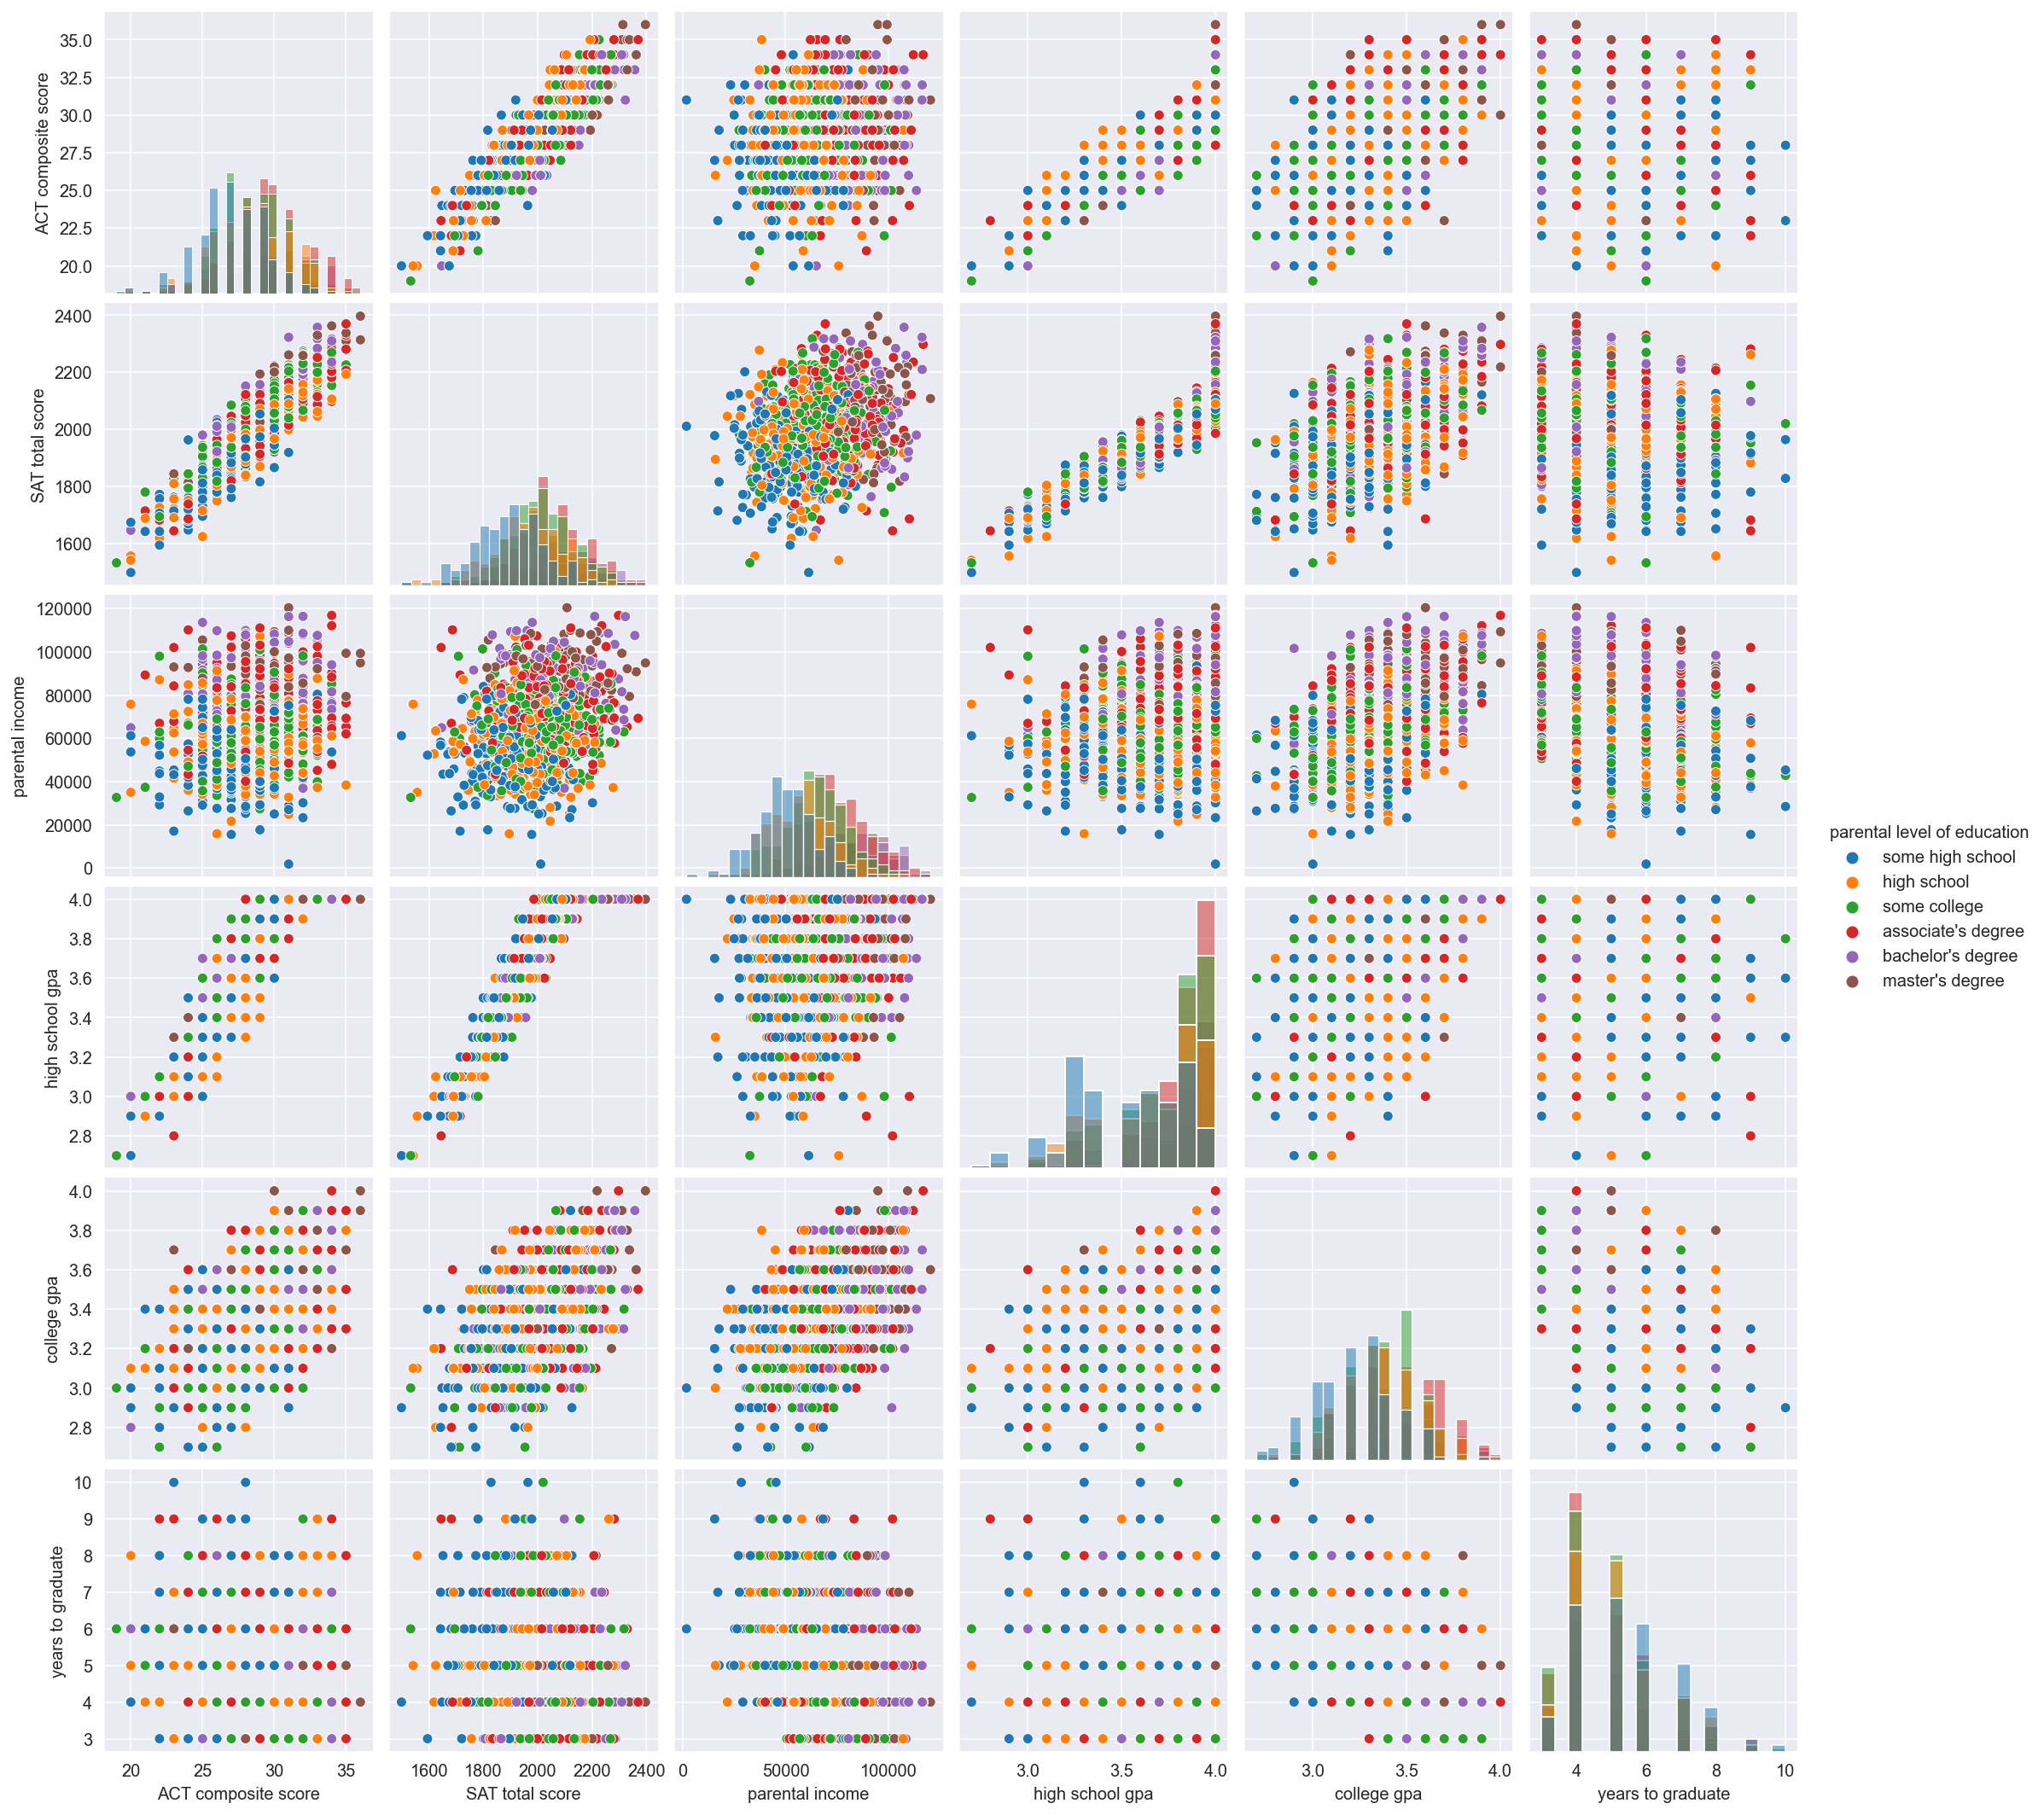

In [11]:
sns.scatterplot(x='ACT composite score', y='SAT total score', data=df)
plt.show()

sns.pairplot(df, hue='parental level of education', diag_kind='hist')
plt.show()

### 1.9 Distance matrices

In order to visualise a distance matrix, it is often important to group the observations in a dataset by a given categorical feature.

For example, we may sort the observations by increasing ``parental level of education``. Because the feature ``parental level of education`` is ordinal but not numerical, we may also decide to remove it from consideration when computing distances between observations.

Furthermore, it is always important to scale different features so that their magnitudes are comparable when computing distances. For example, we may use the ``sklearn`` class ``StandardScaler`` to standardize each feature individually. The method ``StandardScaler.fit_transform`` expects a numpy matrix containing observations across rows and returns a corresponding matrix with standardized features.

In [12]:
from sklearn.preprocessing import StandardScaler

df_sorted = df.sort_values(by='parental level of education', ascending=True)
parental_education_sorted = df_sorted['parental level of education']

X = df_sorted.drop(columns='parental level of education').to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

The ``scipy`` function ``pdist`` (``scipy.spatial.distance.pdist``) can be used to compute pairwise Euclidean distances between observations in a matrix, while the function ``squareform`` (``scipy.spatial.distance.squareform``) can be used to convert the return of ``pdist`` into the representation that we expect (``pdist`` returns a condensed representation of a symmetric matrix).

Finally, the ``seaborn`` function ``heatmap`` can be used to create a heat map for the corresponding distance matrix (for a chosen colormap).


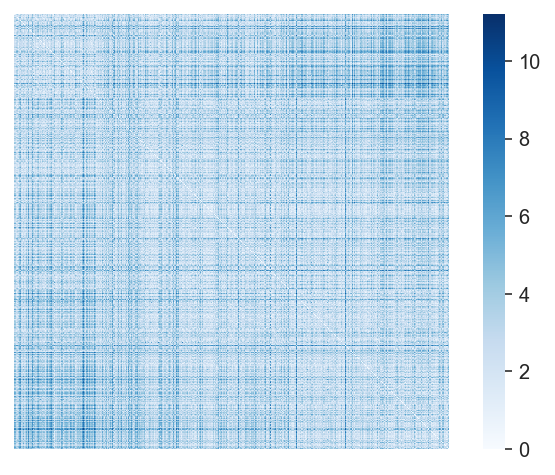

In [13]:
from scipy.spatial import distance

dist = distance.squareform(distance.pdist(X))
sns.heatmap(dist, square=True, xticklabels=False, yticklabels=False,
                cmap='Blues')
    
plt.show()

### 1.10 Dimensionality reduction

The class ``MDS`` from the library ``sklearn`` implements dimensionality reduction through multidimensional scaling. A standardized matrix of observations as the one used to compute the distance matrix in the example above is an appropriate input to the method ``MDS.fit_transform``, which outputs a matrix that contains a two-dimensional point for each observation in the input matrix. A scatter plot can be used to depict this output matrix.

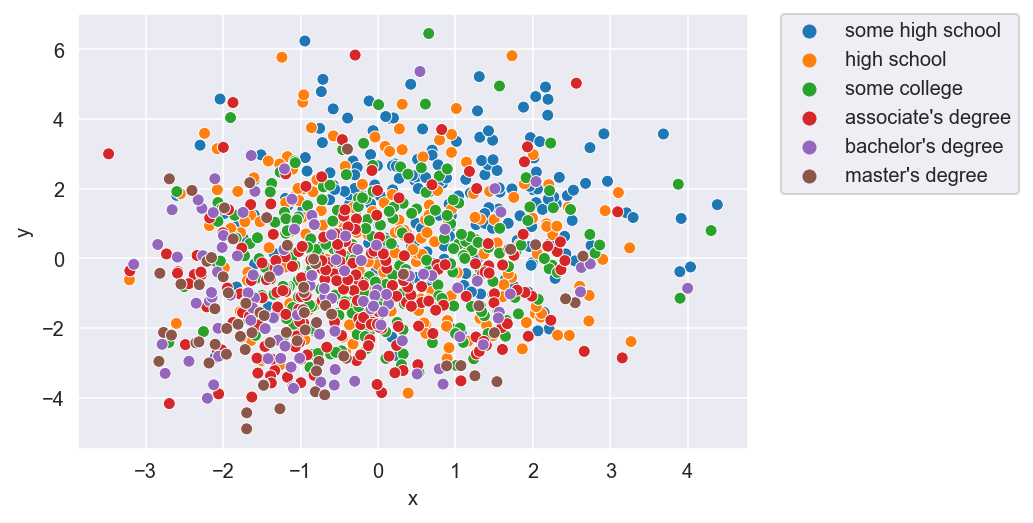

In [14]:
from sklearn.manifold import MDS
    
embedding = MDS(n_components=2)
    
Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'parental level of education': parental_education_sorted})

sns.scatterplot(x='x', y='y', hue='parental level of education', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


The class ``TSNE`` from the library ``sklearn`` implements dimensionality reduction through t-distributed stochastic neighbour embedding (t-SNE). Its interface is analogous to the one provided by the class ``MDS``.

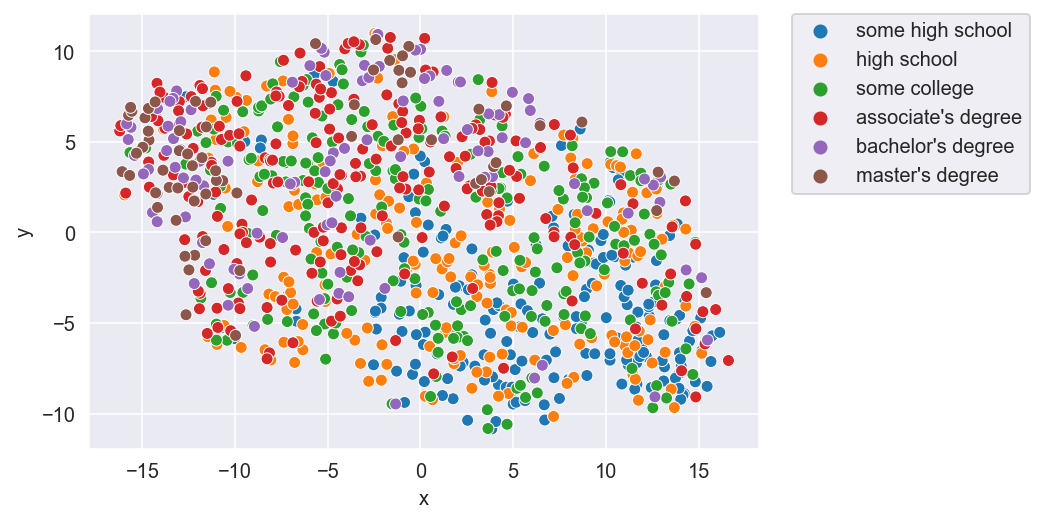

In [15]:
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2, perplexity=100)

Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'parental level of education': parental_education_sorted})
sns.scatterplot(x='x', y='y', hue='parental level of education', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the example below, each point obtained by t-SNE is coloured according to whether the parents of the corresponding student have a higher education degree.

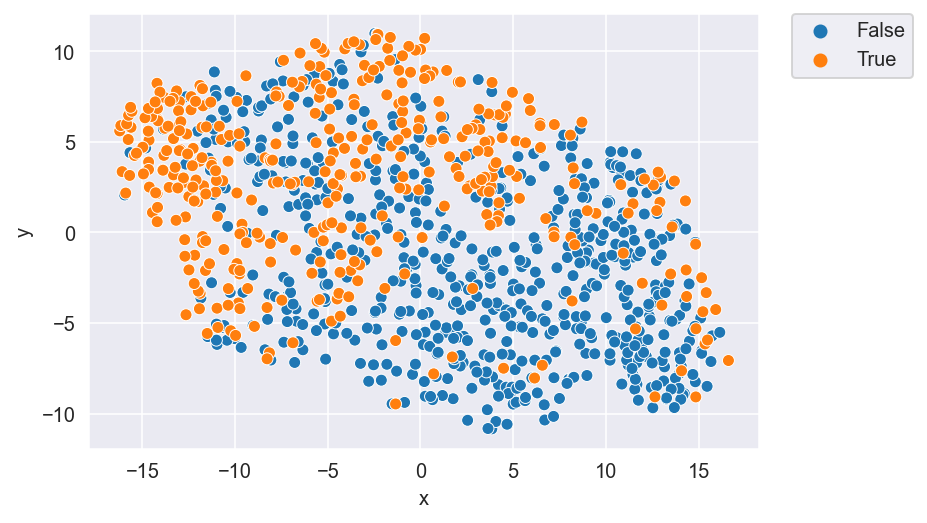

In [16]:
df_projection['parents have degree'] = (df['parental level of education'] > 'some college')
sns.scatterplot(x='x', y='y', hue='parents have degree', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 2 Visualising an analytic function

In order to present Python functionalities related to visualising scalar fields and vector fields, we will use the analytic function $f: \mathbb{R}^2 \to \mathbb{R}$ given by $f(x,y) = z = x^2 + y^2$ as a working example.

The ``numpy`` function ``linspace`` can be used to create a list of evenly spaced numbers in a specified interval, while the function ``meshgrid`` can be used to create all possible combinations of numbers from two given lists of numbers. 

In our example, the function ``meshgrid`` returns two matrices. The first matrix replicates the numbers of the first list across rows. In our example, this matrix represents positions along the x-axis. The second matrix replicates the numbers of the second list across columns. In our example, this matrix represents positions along the y-axis.

By applying elementwise operations that ultimately combine the two matrices, it is possible to evaluate a function of two variables on every element of a grid defined by the two lists of numbers generated by ``linspace``. The resulting dataset can also be represented by a ``DataFrame``.

In [17]:
import numpy as np
x_range = np.linspace(-1, 1, 10)
y_range = np.linspace(-1, 1, 10)

# meshgrid: X[i, j] == x_range[j] and Y[i, j] == y_range[i]
X, Y = np.meshgrid(x_range, y_range)

# Z[i, j] == f(x_range[j], y_range[i])
Z = X**2 + Y**2

# Dataset representation
df = pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'z = f(x,y)': Z.reshape(-1)})
display(df)

x    y  z = f(x,y)
0  -1.000000 -1.0    2.000000
1  -0.777778 -1.0    1.604938
2  -0.555556 -1.0    1.308642
3  -0.333333 -1.0    1.111111
4  -0.111111 -1.0    1.012346
..       ...  ...         ...
95  0.111111  1.0    1.012346
96  0.333333  1.0    1.111111
97  0.555556  1.0    1.308642
98  0.777778  1.0    1.604938
99  1.000000  1.0    2.000000

[100 rows x 3 columns]

### 2.1 Heat maps

The ``matplotlib`` function ``imshow`` can be used to create a heatmap through nearest neighbour interpolation.

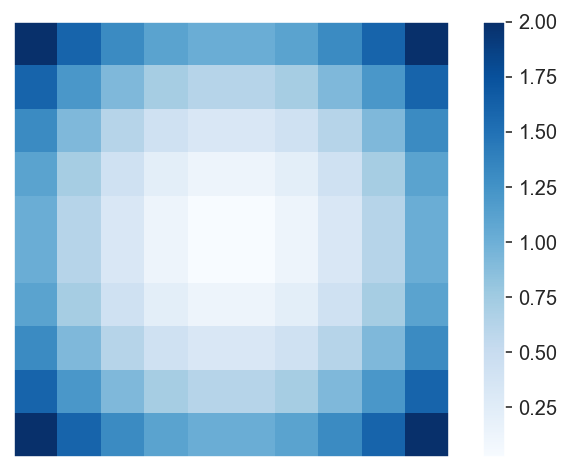

In [18]:
# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()

The ``matplotlib`` function ``imshow`` can also be used to create a heatmap through bilinear interpolation.

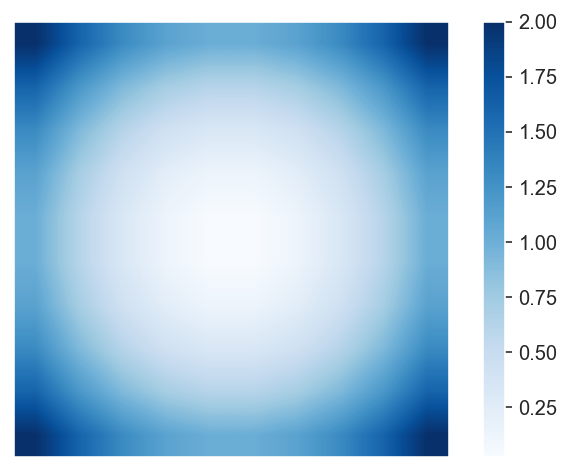

In [19]:
# Interpolation: point (x, y) is colored according to the (weighted average) value z of the four nearest points
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='bilinear')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()

### 2.2 Contour plots

The ``matplotlib`` function ``contour`` can be used to create a contour plot.

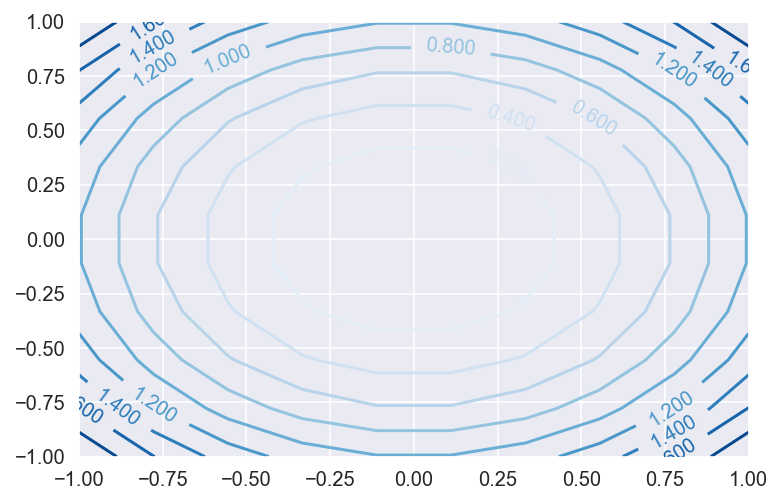

In [20]:
CS = plt.contour(X, Y, Z, levels=10, cmap='Blues')
plt.clabel(CS, inline=True, fontsize=10)
plt.show()

### 2.3 Surface plots

The library ``matplotlib`` is also capable of creating (interactive) three-dimensional plots. Surface plots can be created using the function ``plot_surface``.

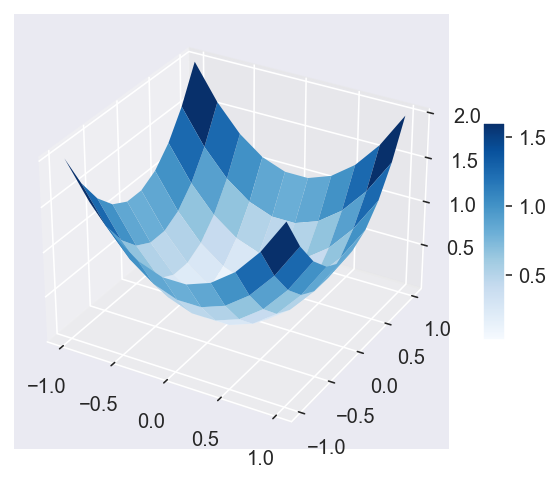

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='Blues', linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

### 2.4 Quiver plots

The ``matplotlib`` function ``quiver`` can be used to create quiver plots. For example, we may use the ``numpy`` function ``gradient`` to approximate the gradient function $\nabla f$ of the scalar field $f$ by the finite differences method, which can then be represented by a quiver plot.

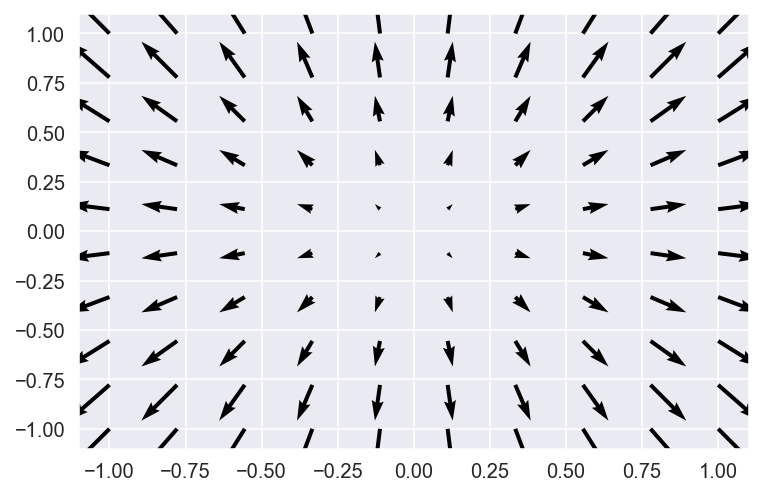

In [22]:
DY, DX = np.gradient(Z)
plt.quiver(X, Y, DX, DY)
plt.show()

1. Based on the box plots presented in Section 1, we can find and show the entire rows that correspond to the outliers regarding ``parental income`` whose parents have a master's degree using table visualisation.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 420 to 411
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   parental level of education  68 non-null     object
 1   parental income              68 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


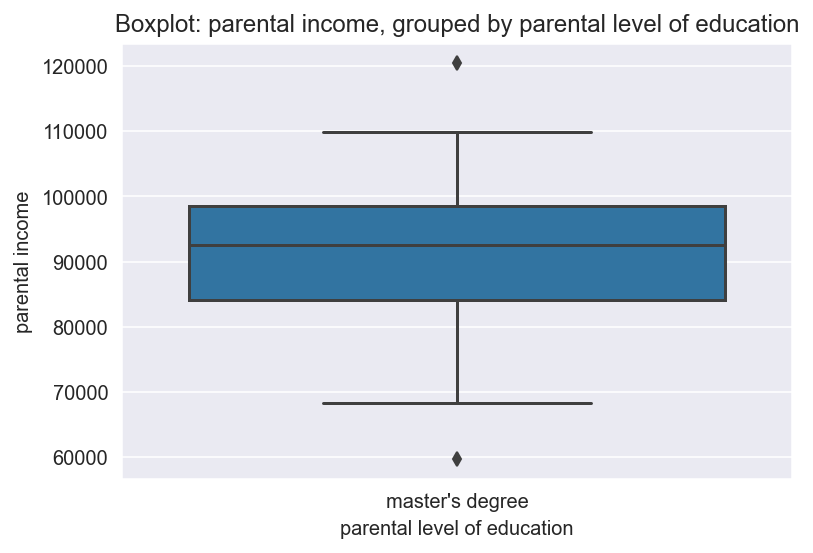

The following are the outliers in the boxplot:
 420     59724
411    120391
Name: parental income, dtype: int64


In [23]:
# Find the outliers

df = pd.read_csv('graduation_rate.csv')

# parents have a master's degree
edu_income = df[['parental level of education', 
                 'parental income']][df['parental level of education'] 
                                     == "master's degree"].sort_values(by = 'parental income')
edu_income.info()

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(x='parental level of education', y='parental income', data=edu_income)
plt.title('Boxplot: parental income, grouped by parental level of education')
plt.show()


# finding the 1st quartile
q1 = np.quantile(edu_income['parental income'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(edu_income['parental income'], 0.75)
med = np.median(edu_income['parental income'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
# default whis = 1.5
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = edu_income['parental income'][(edu_income['parental income'] <= lower_bound) 
                                         | (edu_income['parental income'] >= upper_bound)]
print('The following are the outliers in the boxplot:\n', outliers)

2. The function ``load_wine`` from ``sklearn.datasets`` can be used to load the *wine dataset* into a ``DataFrame`` by using the commands ``data = load_wine()``, ``df = pd.DataFrame(data.data, columns=data.feature_names)``, and ``df['target'] = pd.Series(data.target)``. 
- Therefore, we can:

2.1. Load the wine dataset. Compute the frequency of each value of the 'target' feature.

In [24]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.info()

df['target'] = pd.Series(data.target)
df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

1    71
0    59
2    48
Name: target, dtype: int64

2.2. Compute univariate and multivariate summaries for all numerical features (except from the target feature). Group observations by the target feature and compute the corresponding **median** for each numerical feature. 

In [25]:
print('Univariate summaries:')
display(df.iloc[:, :-1].describe())

print("\nCorrelation coefficients:")
display(df.iloc[:, :-1].corr())

print("\nthe corresponding median for each numerical feature:")
display(df.groupby('target').median())

Univariate summaries:


alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000


Correlation coefficients:


alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315_of_diluted_wines         0.519067        -0.428815  0.565468   
proline                              0.330417         0.316100  0.236183   

                              od280/od315_of_diluted_wines   prol


the corresponding median for each numerical feature:


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
target                                                            
0        13.750       1.770  2.44               16.8      104.0   
1        12.290       1.610  2.24               20.0       88.0   
2        13.165       3.265  2.38               21.0       97.0   

        total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
target                                                                     
0               2.800       2.980                  0.29            1.870   
1               2.200       2.030                  0.37            1.610   
2               1.635       0.685                  0.47            1.105   

        color_intensity    hue  od280/od315_of_diluted_wines  proline  
target                                                                 
0                  5.40  1.070                          3.17   1095.0  
1                  2.90  1.040                          2.83    495.0  
2                  7.55  0.665                          1.66    627.5

2.3. Group observations by the target feature and create one box plot of ``alcohol`` for each group.

In [26]:
target_order = [0, 1, 2]
df['target'] = pd.Categorical(df['target'],ordered=True,categories=target_order)
display(df['target'])

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: category
Categories (3, int64): [0 < 1 < 2]

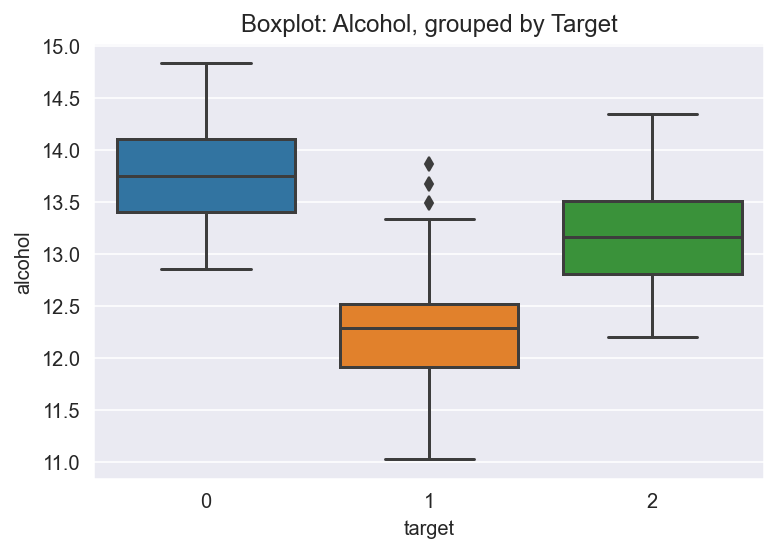

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x='target', y='alcohol', data=df)
plt.title('Boxplot: Alcohol, grouped by Target')

# Wrap xticks 
import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

plt.show()

2.4. Create a scatter plot for the pair of **distinct** numerical features with the highest correlation.

In [28]:
df.corr().unstack().abs().sort_values(ascending = False)[0:20]

alcohol                       alcohol                         1.000000
malic_acid                    malic_acid                      1.000000
od280/od315_of_diluted_wines  od280/od315_of_diluted_wines    1.000000
hue                           hue                             1.000000
color_intensity               color_intensity                 1.000000
proanthocyanins               proanthocyanins                 1.000000
nonflavanoid_phenols          nonflavanoid_phenols            1.000000
total_phenols                 total_phenols                   1.000000
magnesium                     magnesium                       1.000000
alcalinity_of_ash             alcalinity_of_ash               1.000000
ash                           ash                             1.000000
flavanoids                    flavanoids                      1.000000
proline                       proline                         1.000000
total_phenols                 flavanoids                      0.864564
flavan

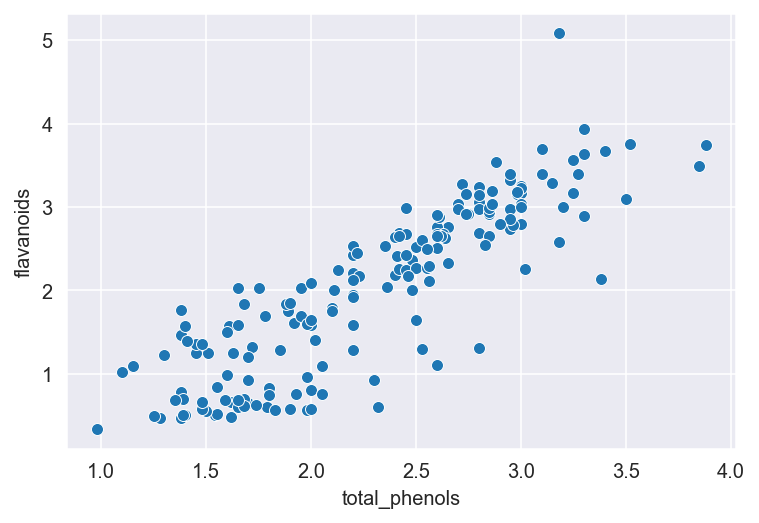

In [29]:
sns.scatterplot(x='total_phenols', y='flavanoids', data=df)
plt.show()

2.5. Exclude the target feature, standardize the remaining numerical features, and display a projection obtained by multidimensional scaling. Color the points by the target feature.

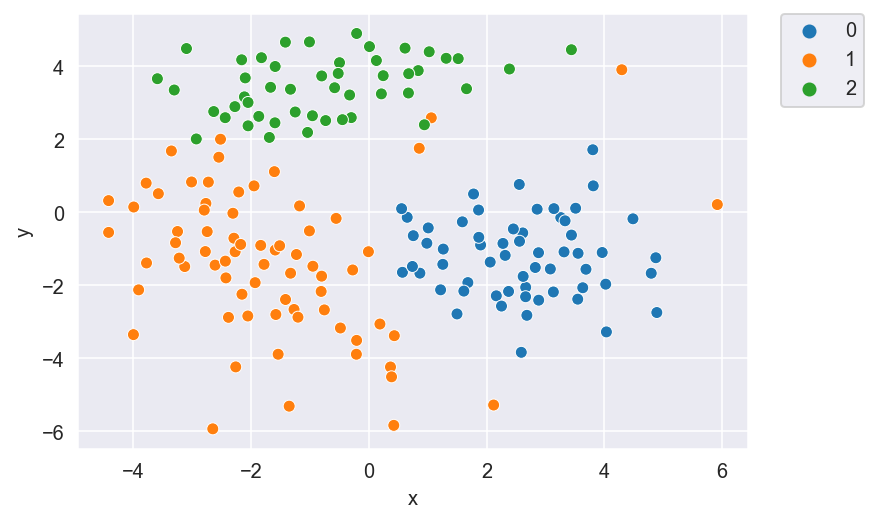

In [30]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

df_sorted = df.sort_values(by='target', ascending=True)

X = df_sorted.drop(columns='target').to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)


embedding = MDS(n_components=2)

target_sorted = df_sorted['target']

Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],'target': target_sorted})

sns.scatterplot(x='x', y='y', hue='target', data=df_projection)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()